In [1]:
## Load Imports ##
import nibabel as nib
import numpy as np
from scipy import stats


import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from metrics import dice_coef
from data_generator import DataGenerator
from data_loader import *

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask


/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [166]:
slice_type = 'side'
train_dir = ('../slice_data_' + slice_type + '_val')
dim =(256,256)
# Loading Data
print('Loading Data...')
partition={}
(partition['x_train'],
partition['y_train'],
partition['x_val'],
partition['y_val'],
partition['x_test'],
partition['y_test'])  = load_data(train_dir, split=(100, 0, 0))
# Parameters for input data
params1 = {'dim': dim,
          'batch_size': 1,
          'n_channels': 1,
          'shuffle': False}



training_generator = DataGenerator(partition['x_train'], partition['y_train'], **params1)

print(len(training_generator))
for input_ex in partition['x_train']:
    print(input_ex)

Loading Data...
6377
../slice_data_side_val/IXI519-HH-2240-T1_side_68.nii
../slice_data_side_val/IXI565-HH-2534-T1_side_53.nii
../slice_data_side_val/IXI412-Guys-0949-T1_side_56.nii
../slice_data_side_val/IXI279-Guys-1044-T1_side_115.nii
../slice_data_side_val/IXI491-Guys-1032-T1_side_54.nii
../slice_data_side_val/IXI200-Guys-0812-T1_side_119.nii
../slice_data_side_val/IXI330-Guys-0881-T1_side_149.nii
../slice_data_side_val/IXI495-Guys-1009-T1_side_27.nii
../slice_data_side_val/IXI038-Guys-0729-T1_side_147.nii
../slice_data_side_val/IXI569-Guys-1101-T1_side_129.nii
../slice_data_side_val/IXI211-HH-1568-T1_side_62.nii
../slice_data_side_val/IXI200-Guys-0812-T1_side_89.nii
../slice_data_side_val/IXI347-IOP-0927-T1_side_118.nii
../slice_data_side_val/IXI368-Guys-0916-T1_side_19.nii
../slice_data_side_val/IXI222-Guys-0819-T1_side_53.nii
../slice_data_side_val/IXI027-Guys-0710-T1_side_44.nii
../slice_data_side_val/IXI122-Guys-0773-T1_side_106.nii
../slice_data_side_val/IXI437-HH-2152-T1_sid

../slice_data_side_val/IXI423-IOP-0974-T1_side_26.nii
../slice_data_side_val/IXI204-HH-1651-T1_side_5.nii
../slice_data_side_val/IXI048-HH-1326-T1_side_73.nii
../slice_data_side_val/IXI300-Guys-0880-T1_side_32.nii
../slice_data_side_val/IXI304-Guys-0862-T1_side_105.nii
../slice_data_side_val/IXI130-HH-1528-T1_side_67.nii
../slice_data_side_val/IXI122-Guys-0773-T1_side_73.nii
../slice_data_side_val/IXI074-Guys-0771-T1_side_53.nii
../slice_data_side_val/IXI358-Guys-0919-T1_side_95.nii
../slice_data_side_val/IXI456-Guys-1019-T1_side_41.nii
../slice_data_side_val/IXI030-Guys-0708-T1_side_56.nii
../slice_data_side_val/IXI093-HH-1359-T1_side_59.nii
../slice_data_side_val/IXI250-Guys-0836-T1_side_61.nii
../slice_data_side_val/IXI450-Guys-1093-T1_side_20.nii
../slice_data_side_val/IXI544-HH-2395-T1_side_57.nii
../slice_data_side_val/IXI411-Guys-0959-T1_side_137.nii
../slice_data_side_val/IXI034-HH-1260-T1_side_26.nii
../slice_data_side_val/IXI278-HH-1771-T1_side_149.nii
../slice_data_side_val/

../slice_data_side_val/IXI481-HH-2175-T1_side_27.nii
../slice_data_side_val/IXI531-Guys-1057-T1_side_11.nii
../slice_data_side_val/IXI534-Guys-1062-T1_side_100.nii
../slice_data_side_val/IXI025-Guys-0852-T1_side_134.nii
../slice_data_side_val/IXI511-HH-2238-T1_side_81.nii
../slice_data_side_val/IXI254-HH-1705-T1_side_1.nii
../slice_data_side_val/IXI411-Guys-0959-T1_side_63.nii
../slice_data_side_val/IXI293-IOP-0876-T1_side_59.nii
../slice_data_side_val/IXI135-Guys-0779-T1_side_58.nii
../slice_data_side_val/IXI199-Guys-0802-T1_side_26.nii
../slice_data_side_val/IXI287-Guys-0863-T1_side_100.nii
../slice_data_side_val/IXI291-IOP-0882-T1_side_116.nii
../slice_data_side_val/IXI014-HH-1236-T1_side_79.nii
../slice_data_side_val/IXI562-Guys-1131-T1_side_26.nii
../slice_data_side_val/IXI261-HH-1704-T1_side_53.nii
../slice_data_side_val/IXI414-Guys-0957-T1_side_80.nii
../slice_data_side_val/IXI454-Guys-1083-T1_side_40.nii
../slice_data_side_val/IXI081-Guys-0855-T1_side_58.nii
../slice_data_side_

-------- Input ---------
(256, 256)


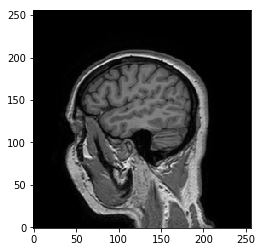

DescribeResult(nobs=65536, minmax=(0.0, 1.0), mean=0.16378893571924102, variance=0.04581610929374352, skewness=1.0270573545627641, kurtosis=-0.10343582157189868)
-------- Mask Edited ---------
(256, 256)


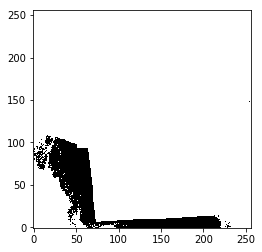

DescribeResult(nobs=65536, minmax=(0.0, 1.0), mean=0.918914794921875, variance=0.07451153155130608, skewness=-3.0693559971879445, kurtosis=7.420946237473601)
-------- Original ---------


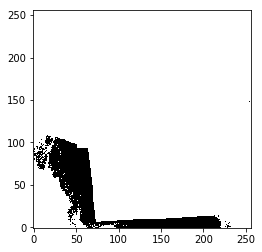

DescribeResult(nobs=65536, minmax=(0, 1), mean=0.918914794921875, variance=0.07451153155130608, skewness=-3.0693559971879445, kurtosis=7.420946237473601)
-------- Predicted ---------


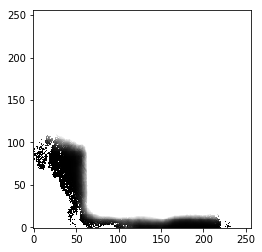

DescribeResult(nobs=65536, minmax=(2.8415534e-09, 0.63218844), mean=0.591079, variance=0.021057362, skewness=-3.4339592456817627, kurtosis=10.173324426015375)
-------- Predicted ---------


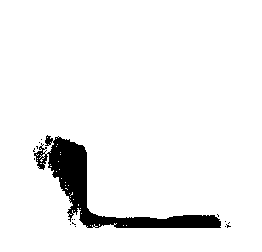

DescribeResult(nobs=65536, minmax=(0.0, 1.0), mean=0.918869, variance=0.0745499, skewness=-3.068230152130127, kurtosis=7.414037699482355)
---------- Applied Predicted --------
-------- Dice Coef. ---------
0.9222086351236949
../slice_data_side_val/IXI224-Guys-0823-T1_side_112.nii


In [173]:
%matplotlib inline
#example to look at
num_example = 1043
example_x = ((training_generator[num_example])[0])[0, :, :, 0]
example_y = ((training_generator[num_example])[1])[0, :, :, 0]

print('-------- Input ---------')
print(example_x.shape)
show_slice(example_x)
plt.show()
print(stats.describe(example_x, axis=None))

print('-------- Mask Edited ---------')
print(example_y.shape)
show_slice(example_y)
plt.show()
print(stats.describe(example_y, axis=None))

print('-------- Original ---------')
ex1 = partition['y_train'][num_example]
ex1_data = nib.load(ex1).get_data()
show_slice(ex1_data)
plt.show()
print(stats.describe(ex1_data, axis=None))

#../slice_data_back_val/IXI166-Guys-0846-T1_back_10.nii
print('-------- Predicted ---------')
ex1_pred = partition['y_train'][num_example].replace('mask_', 'mask_pred_')
ex1_pred = ex1_pred.replace('val','val_pred')
ex1_pred_data = (nib.load(ex1_pred).get_data())[:,:,0]
show_slice(ex1_pred_data)
plt.show()
print(stats.describe(ex1_pred_data, axis=None))

print('-------- Predicted ---------')
thresh = 0.56
thresh_pred = thresholdMask(ex1_pred_data, thresh)
show_slice(thresh_pred)
plt.axis('off')
plt.show()
print(stats.describe(thresh_pred, axis=None))

print('---------- Applied Predicted --------')
#applied = 

print('-------- Dice Coef. ---------')
# Predicted Dice Score
print(dice_coef(example_y, ex1_pred_data, threshold=thresh))

print(partition['x_train'][1043])

In [146]:
# Determine Dice Ceoficient
samples = len(training_generator)-1 if len(training_generator) < 500 else 500
samples = len(training_generator)-1
print(samples)
idx = 0
thresh = 0.55
dc_list = []
for x, y in training_generator:
    example_x = ((x))[0, :, :, 0]
    example_y = ((y))[0, :, :, 0]
    # Get the predicted example
    ex1_pred = partition['y_train'][idx].replace('mask_', 'mask_pred_')
    ex1_pred = ex1_pred.replace('val','val_pred')
    if not os.path.isfile(ex1_pred):
        continue
    ex1_pred_data = (nib.load(ex1_pred).get_data())[:,:,0]
    # Compute the dice coefficient
    dc = dice_coef(example_y, ex1_pred_data, threshold=thresh)
    if dc != -1:
        dc_list.append(dc)
    if samples == idx:
        break 
    idx+=1


2549


In [154]:
# Compute stats of dc_list
print(stats.describe(dc_list, axis=None))
print(np.argmax(dc_list))
sorted_dc_list = sorted(dc_list, reverse=True)
print(sorted_dc_list[0:5])


DescribeResult(nobs=2550, minmax=(0.0, 0.9850424587266693), mean=0.8724397396822225, variance=0.02047794783969609, skewness=-3.401300641980651, kurtosis=13.371971793256844)
1043
[0.9850424587266693, 0.9849348972344776, 0.984729291994447, 0.9839374555792466, 0.9824398784695402]


In [169]:
for idx,val in enumerate(partition['x_train']):
    if 'IXI068-Guys-0756-T1' in val[0]:
        print(idx, val)

In [ ]:
# Test precision
